# Importing The Neccesary Libraries

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# Extracting The Data 

The stock data of TATA Motors was obtained using the yfinance module, covering the time period from 1999 to 2023. The data was then extracted and stored for further analysis.

In [2]:
start_date = '1999-01-01'
end_date = '2023-01-30'
ticker = 'TATAMOTORS.NS'

df = yf.download(ticker, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  \
Date                                                                    
1999-01-01 00:00:00+05:30  31.599886  32.155613  31.053738  31.839424   
1999-01-04 00:00:00+05:30  32.021473  32.663437  31.561560  31.676538   
1999-01-05 00:00:00+05:30  31.714865  34.215645  31.283695  34.215645   
1999-01-06 00:00:00+05:30  34.637230  35.317520  33.870708  35.221703   
1999-01-07 00:00:00+05:30  35.269611  36.850563  35.164215  36.697258   

                           Adj Close    Volume  
Date                                            
1999-01-01 00:00:00+05:30  24.843615  18835718  
1999-01-04 00:00:00+05:30  24.716518  18245781  
1999-01-05 00:00:00+05:30  26.697729  38938718  
1999-01-06 00:00:00+05:30  27.482733  40059886  
1999-01-07 00:00:00+05:30  28.634075  35983032

# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6028 entries, 1999-01-01 00:00:00+05:30 to 2023-01-27 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6028 non-null   float64
 1   High       6028 non-null   float64
 2   Low        6028 non-null   float64
 3   Close      6028 non-null   float64
 4   Adj Close  6028 non-null   float64
 5   Volume     6028 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 329.7 KB


In [4]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  6028.000000  6028.000000  6028.000000  6028.000000  6028.000000   
mean    202.956120   206.069199   199.450769   202.632334   196.940314   
std     157.467669   159.297928   155.331815   157.210658   160.128505   
min      11.114574    11.631977    11.028340    11.267879     9.099407   
25%      74.046066    75.834558    72.479485    74.074806    63.429535   
50%     157.711983   160.313713   154.344498   157.524246   145.568817   
75%     325.000000   329.437515   316.587494   322.912498   321.675591   
max     600.212097   605.901123   589.873047   598.134399   597.892273   

             Volume  
count  6.028000e+03  
mean   1.653949e+07  
std    2.155284e+07  
min    0.000000e+00  
25%    5.864080e+06  
50%    1.004400e+07  
75%    1.855525e+07  
max    3.905778e+08

# Exploratory Data Analysis

In [5]:
# Average,Median, STd , max  and min of Closing Price
print("Mean of closing price: ", df['Close'].mean())
print("Median of closing price: ", df['Close'].median())
print("Standard deviation of closing price: ", df['Close'].std())
print("Maximum value Of closing price: ",df['Close'].max())
print("Mininum value Of closing price: ",df['Close'].min())

Mean of closing price:  202.63233395515093
Median of closing price:  157.5242462158203
Standard deviation of closing price:  157.21065758307998
Maximum value Of closing price:  598.1343994140625
Mininum value Of closing price:  11.267878532409668


 The high standard deviation and the large difference between the max and min values indicate high volatility in the stock prices

In [6]:
# Percent Return Of Closing Price
returns = df['Close'].pct_change()
returns.head()

Date
1999-01-01 00:00:00+05:30         NaN
1999-01-04 00:00:00+05:30   -0.005116
1999-01-05 00:00:00+05:30    0.080157
1999-01-06 00:00:00+05:30    0.029403
1999-01-07 00:00:00+05:30    0.041893
Name: Close, dtype: float64

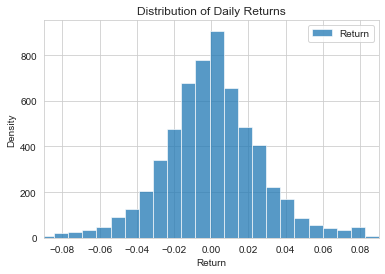

In [7]:
sns.histplot(returns[1:], bins=50,label='Return')
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Distribution of Daily Returns')
plt.legend()
plt.gca().set_xlim(-0.09, 0.09)
plt.show()

Most of the distribution of daily returns of TATA Motors stock is between -0.02 and 0.02 indicates that the stock's daily returns are relatively stable and do not experience large fluctuations. A high concentration of returns in a narrow range suggests that the stock's price changes relatively little from day to day.

In [8]:
# Date With Lowest and Highest Returns
print(returns.idxmin())
print(returns.idxmax())

2019-02-08 00:00:00+05:30
2021-10-13 00:00:00+05:30


Lowest Return By TATA Motors

- Tata Motors share price crashed 22.41% to a 52-week low of 141.90, due to a Rs 27,838 crore non-cash charge to cover impairment at JLR, and a cut in future profit margin outlook.

Highest Return By TATA Motors

- Tata Motors' stock rose 50.82% in five days to close at Rs 506.75 on 13 Oct 2021 due to a 1 billion Dollar investment from TPG Rise   Climate to raise the valuation of the company's passenger electric vehicle business to up to 9.1 billion Dollar.

In [9]:
# Chart Variation Between the Highest Returns and Lowest Returns
Chart = df[["Open","High","Low","Close"]].loc['2019-01-01 00:00:00+05:30':'2022-01-01 00:00:00+05:30']
Chart.iplot(kind='candle')

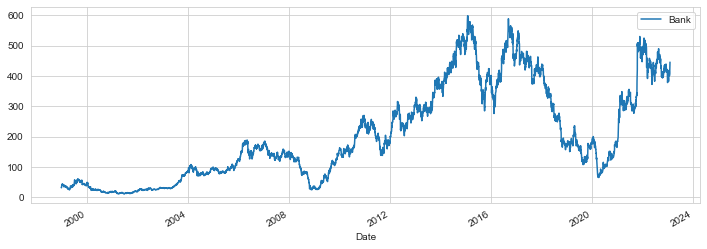

In [10]:
Closed_price = df['Close']
Closed_price.plot(label="Bank",figsize=(12,4))
plt.legend()

This Is Interactive Version Of Above Plot Using Plotly Iplot() Method.

In [11]:
Closed_price.iplot()

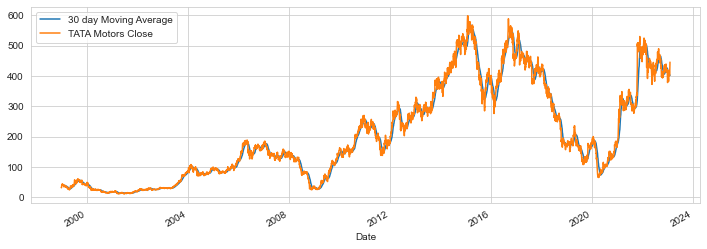

In [12]:
plt.figure(figsize=(12,4))
df['Close'].rolling(window=30).mean().plot(label='30 day Moving Average')
df['Close'].plot(label='TATA Motors Close')
plt.legend()

In [13]:
Moving_Avg = df['Close'].rolling(window=30).mean()
New_df = pd.merge(Moving_Avg,Closed_price,on = 'Date')
New_df.rename(columns = {'Close_x':'Moving 30 Day Avg'}, inplace = True)
New_df.rename(columns = {'Close_y':'Closing Price'}, inplace = True)
New_df.iplot()

30-day moving average and the closing price trendline are moving in the same direction on a long-term trend for TATA Motors stock, it means that the stock's average price over the past 30 days and the closing price trend are aligned, indicating a strong trend in the stock's price movement.

<AxesSubplot:>

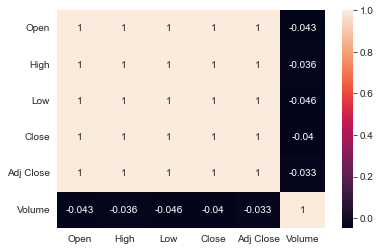

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df['Close'].loc['2022-01-01 00:00:00+05:30':'2023-01-30 00:00:00+05:30'].ta_plot(study='sma',periods=[7,21,55])

The plot will show the stock price with the three moving averages superimposed. Traders and investors can use the plot to help identify trends and make investment decisions. The moving averages can also be used to determine the strength of a trend and provide potential buy or sell signals based on the relationship between the stock price and the moving averages.

In [16]:
df['Close'].loc['2022-01-30 00:00:00+05:30':'2023-01-30 00:00:00+05:30'].ta_plot(study='boll')

The plot will show the stock price with the Bollinger Bands superimposed. Traders and investors can use the plot to help identify trends and make investment decisions. The Bollinger Bands can also be used to determine the volatility of a stock and provide potential buy or sell signals based on the stock price relative to the upper and lower bands. When the stock price is near the upper band, it may be overbought, and when it is near the lower band, it may be oversold.

# Feature Engineering

In [17]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [18]:
# Change In Price in Term Of Close and Open
df['change_percent'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

In [19]:
df['high_low_percent'] = (df['High'] - df['Low']) / df['Close'] * 100.0

The high_low_percent column indicates the range of price movement within a single day, while the change_percent column indicates the overall change in price from the opening to closing of the market.

In [20]:
# Keeping The Neccesary Column
df = df[['Close', 'high_low_percent', 'change_percent']]

In [21]:
# Weekly Moving Average
df['ma_7'] = df['Close'].rolling(window=7).mean()

Moving averages are used in technical analysis to smooth out fluctuations in the stock price and identify trends over a longer time period. By calculating different moving averages with different time periods, traders and investors can identify different trends and determine the strength of those trends. For example, a 7-day moving average will give a quicker response to price changes compared to a 90-day moving average.

In [22]:
# Bollinger Bands for a Close price

df['ma_20'] = df['Close'].rolling(window=20).mean()

df['std_20'] = df['Close'].rolling(window=20).std()

df['upper_band'] = df['ma_20'] + 2 * df['std_20']

df['lower_band'] = df['ma_20'] - 2 * df['std_20']
df = df.drop(['ma_20'],axis=1)

Bollinger Bands are a technical analysis tool used to identify when a stock price is overbought or oversold.The Bollinger Band formula is used to calculate an upper and lower band around a moving average of a stock price. 
The formula is as follows:

Upper Band = Moving Average (MA) + 2 * Standard Deviation (STD)
Lower Band = Moving Average (MA) - 2 * Standard Deviation (STD)

MA = Moving average of the stock price over a specified time period (usually 20 days)
STD = Standard deviation of the stock price over the same specified time period

The upper band represents overbought conditions, while the lower band represents oversold conditions. When the stock price moves outside the bands, it can signal a potential trend reversal.

In [23]:
df['momentum'] = df['Close'].diff(periods=1)

Momentum value can be used to identify trending stocks and measure the strength of the trend. A positive momentum value indicates an upward trend, while a negative momentum value indicates a downward trend.

In [24]:
df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))

Log returns are also useful for calculating volatility, as they allow for easy calculation of compounded returns over a specified time period.

In [25]:
df.dropna(inplace=True)

In [26]:
df.head()

Close  high_low_percent  change_percent  \
Date                                                                     
1999-01-28 00:00:00+05:30  40.434055          3.744076       -2.450305   
1999-01-29 00:00:00+05:30  40.606522          3.586592        0.712926   
1999-02-01 00:00:00+05:30  37.942860          6.363630       -5.736725   
1999-02-02 00:00:00+05:30  37.799133          3.903675       -0.529505   
1999-02-03 00:00:00+05:30  37.799133          5.754118       -1.375003   

                                ma_7    std_20  upper_band  lower_band  \
Date                                                                     
1999-01-28 00:00:00+05:30  41.420953  3.558537   46.533092   32.298945   
1999-01-29 00:00:00+05:30  41.425059  3.084511   46.023395   33.685352   
1999-02-01 00:00:00+05:30  40.584623  2.466443   45.100576   35.234803   
1999-02-02 00:00:00+05:30  39.907071  2.116659   44.580181   36.113546   
1999-02-03 00:00:00+05:30  39.503278  1.849838   44.175412   36.776058   

                           momentum  log_returns  
Date                                              
1999-01-28 00:00:00+05:30 -0.881500    -0.021567  
1999-01-29 00:00:00+05:30  0.172466     0.004256  
1999-02-01 00:00:00+05:30 -2.663662    -0.067847  
1999-02-02 00:00:00+05:30 -0.143726    -0.003795  
1999-02-03 00:00:00+05:30  0.000000     0.000000

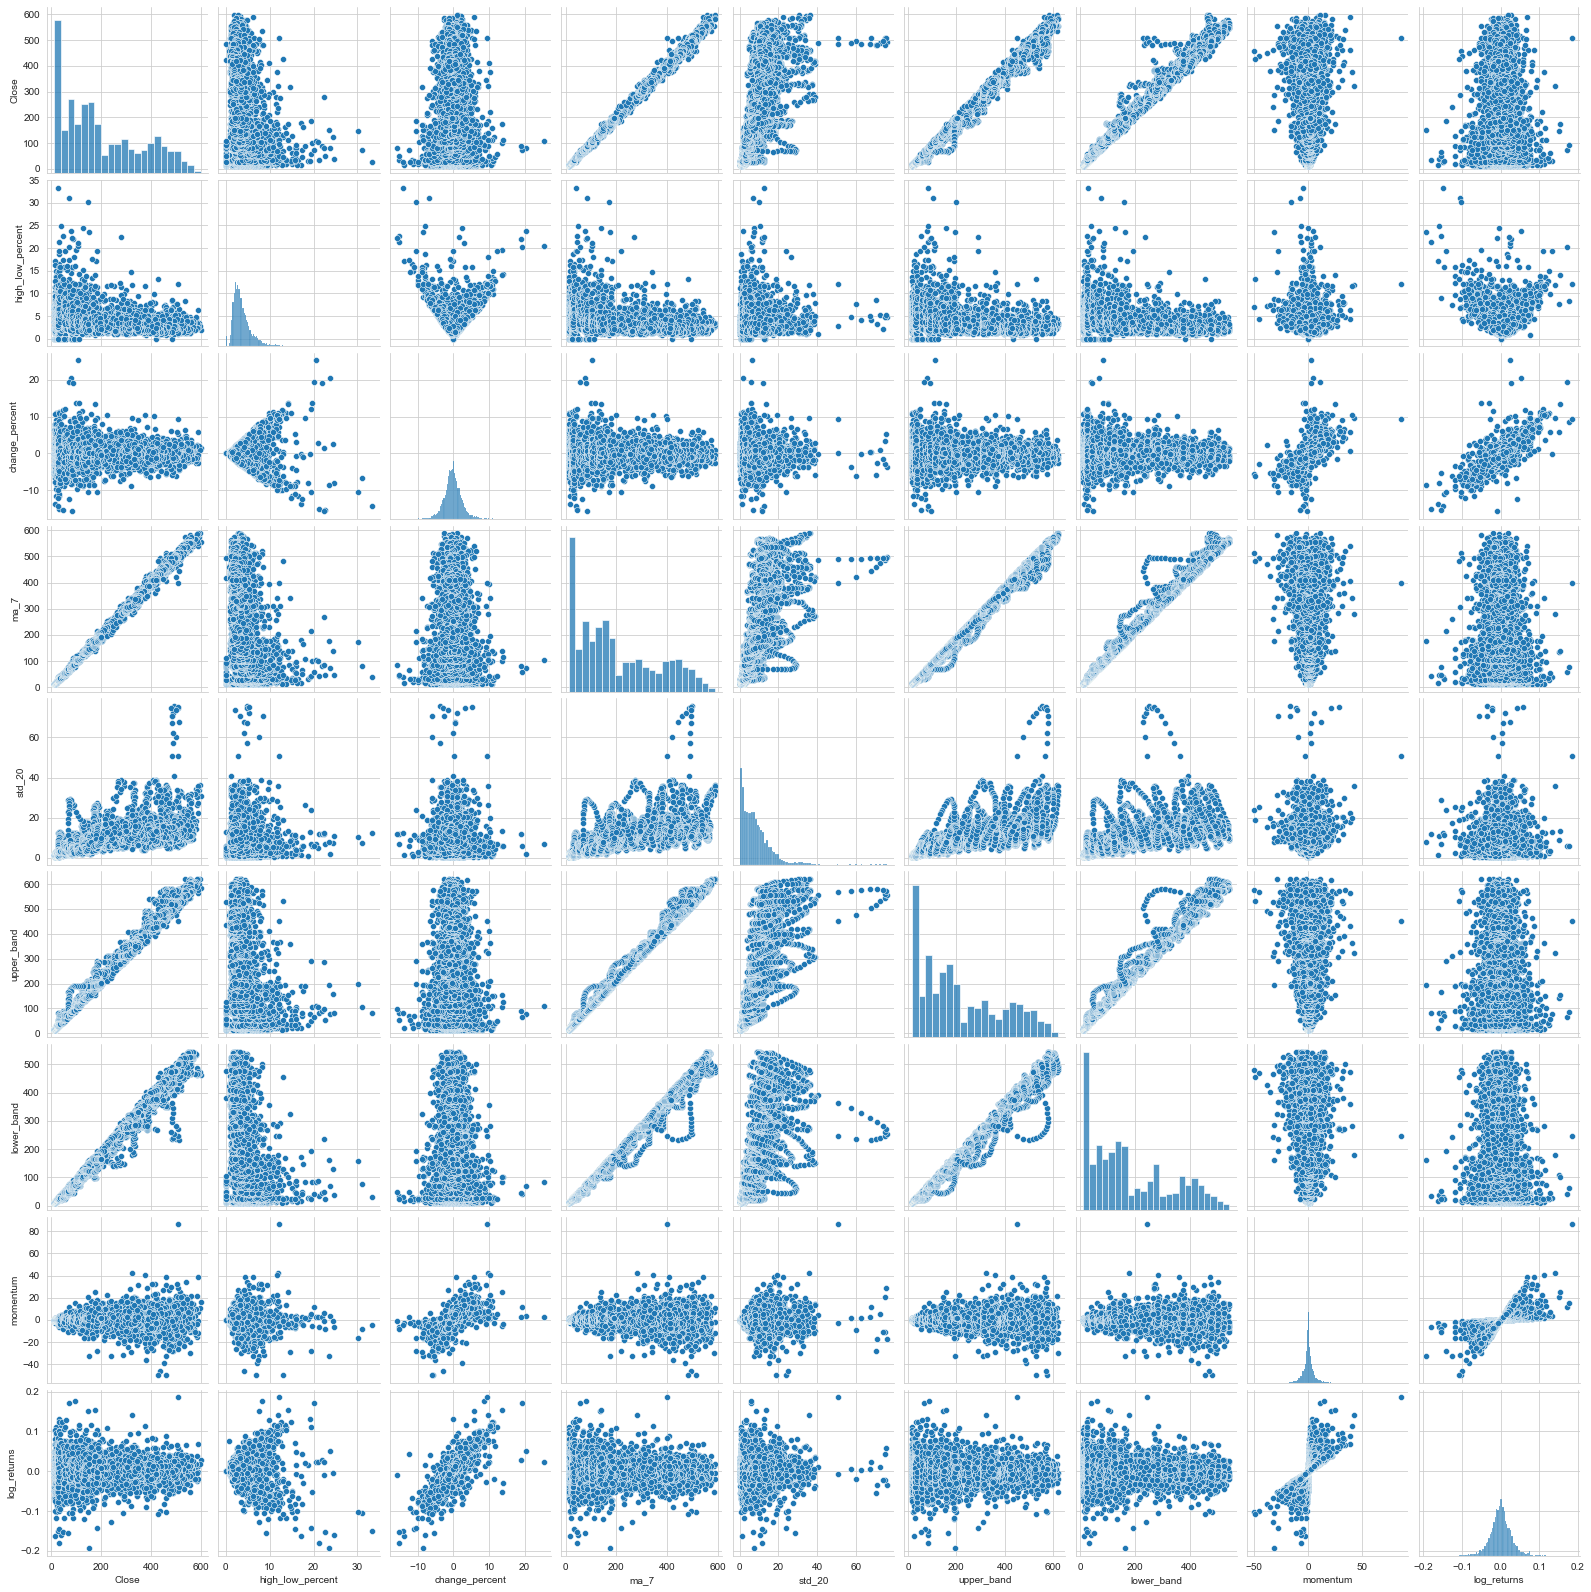

In [27]:
sns.pairplot(df)

<AxesSubplot:>

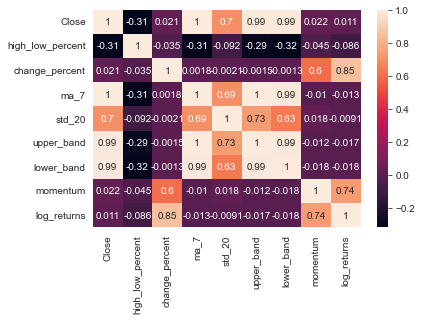

In [28]:
sns.heatmap(df.corr(),annot=True)

The close price of the stock shows a strong correlation with its 7-day moving average, as well as with the upper and lower bands of Bollinger Bands. The change in percentage between the open and close prices is highly associated with the stock's momentum and log returns.

In [29]:
df.columns

Index(['Close', 'high_low_percent', 'change_percent', 'ma_7', 'std_20',
       'upper_band', 'lower_band', 'momentum', 'log_returns'],
      dtype='object')

# Model Training

In [30]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df = df_scaled

In [31]:
X = df.drop(['Close'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)

model_rf = RandomForestRegressor(n_jobs=-1)
model_rf.fit(X_train, y_train)

model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [33]:
y_predict_lr = model_lr.predict(X_test)
y_predict_rf = model_rf.predict(X_test)
y_predict_svr = model_svr.predict(X_test)

In [34]:
print("R2 score for linear regression: ", r2_score(y_test, y_predict_lr))
print("R2 score for random forest: ", r2_score(y_test, y_predict_rf))
print("R2 score for SVR: ", r2_score(y_test, y_predict_svr))

R2 score for linear regression:  0.9986763282194503
R2 score for random forest:  0.9982193137373738
R2 score for SVR:  0.9952447665510197


### Based on the model accuracy of 0.9986763282194503, it can be concluded that the Linear Regression model is the best suitable model for this data.

In [35]:
model = LinearRegression().fit(X_train,y_train)
y_test_predict = model.predict(X_test)
score = r2_score(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("R2_Score:",score)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

R2_Score: 0.9986763282194503
MSE: 0.0012681948195717545
MAE: 0.023486980390942897
RMSE: 0.03561172306378553


In [36]:
pd.options.display.float_format = '{:.13f}'.format
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check['difference'] = y_test - y_test_predict
test_check.sort_index()

actual       prediction       difference
1    -1.0341334078394 -1.0228623476055 -0.0112710602339
4    -1.0519947173852 -1.0416163836474 -0.0103783337378
12   -1.0491905301332 -1.0660854057627  0.0168948756295
14   -1.0425458967852 -1.0486002001763  0.0060543033911
15   -1.0443746945091 -1.0428783158213 -0.0014963786878
...               ...              ...              ...
5975  1.3424439875658  1.3872462126301 -0.0448022250642
5984  1.1146754731732  1.1859535568910 -0.0712780837178
5988  1.1627103918786  1.1326224991821  0.0300878926964
5994  1.1378976511291  1.1346723102760  0.0032253408531
6008  1.5425368646766  1.4997365999674  0.0428002647092

[1202 rows x 3 columns]

<AxesSubplot:xlabel='Close'>

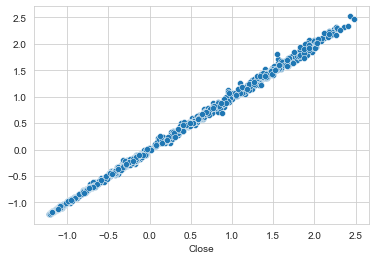

In [37]:
sns.scatterplot(y_test,y_test_predict)